In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/jobs_clean.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,salary_usd,experience_rank,company_country,requires_python,requires_sql,requires_ml,requires_ai
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M,Other,348516,NaN,US,0,0,0,0
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M,Other,232344,NaN,US,0,0,0,0
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M,Data Scientist,145400,NaN,US,0,0,0,0
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M,Data Scientist,81600,NaN,US,0,0,0,0
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M,Other,160000,NaN,US,0,0,0,0


In [2]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
df.shape


(71913, 19)

In [4]:
df["job_title_clean"].value_counts()


job_title_clean
Other               45313
Data Scientist       7216
Data Engineer        7112
Data Analyst         6490
ML Engineer          4221
AI Engineer          1211
Business Analyst      350
Name: count, dtype: int64

Apart from Other, Data Engineers and Scientists are the most in the list

# Salary by role

In [5]:
salary_by_role = (
    df.groupby("job_title_clean")["salary_usd"]
      .median()
      .sort_values(ascending=False)
)

salary_by_role


job_title_clean
ML Engineer         175800.0
AI Engineer         150000.0
Other               142000.0
Data Scientist      141843.0
Data Engineer       135020.0
Business Analyst    107450.0
Data Analyst         95000.0
Name: salary_usd, dtype: float64

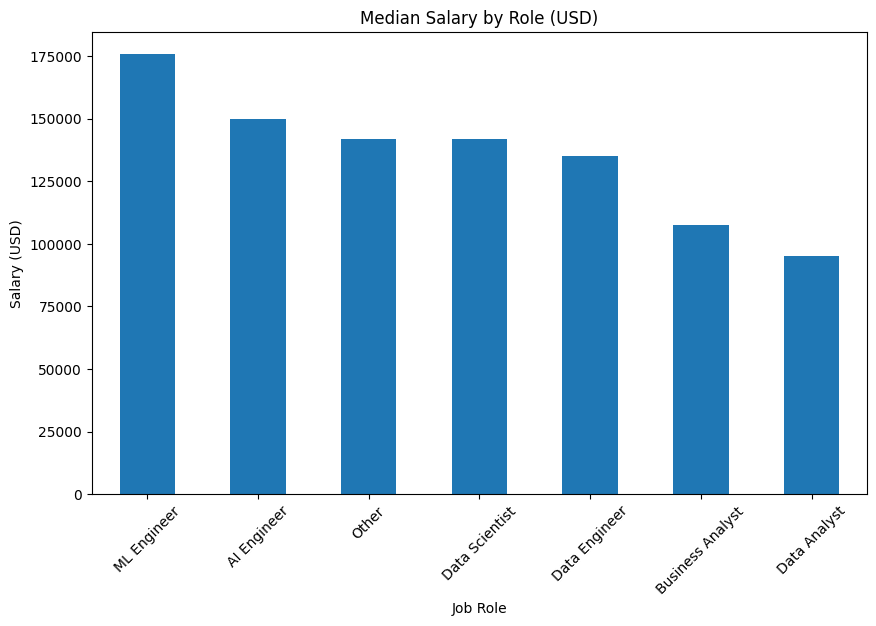

In [6]:
salary_by_role.plot(kind="bar")
plt.title("Median Salary by Role (USD)")
plt.ylabel("Salary (USD)")
plt.xlabel("Job Role")
plt.xticks(rotation=45)
plt.show()


ML Engineers are paid the most and Data Analyst is paid the lowest.
There is a difference of 75,000 AUD in the salary when both the salaries are compared.

In [7]:
df.groupby("experience_level")["salary_usd"].median()


experience_level
EN     85469.0
EX    190000.0
MI    122000.0
SE    156160.0
Name: salary_usd, dtype: float64

EN - Entry Level | 
EX - Executive Level | 
MI - Mid Level | 
SE - Senior Level

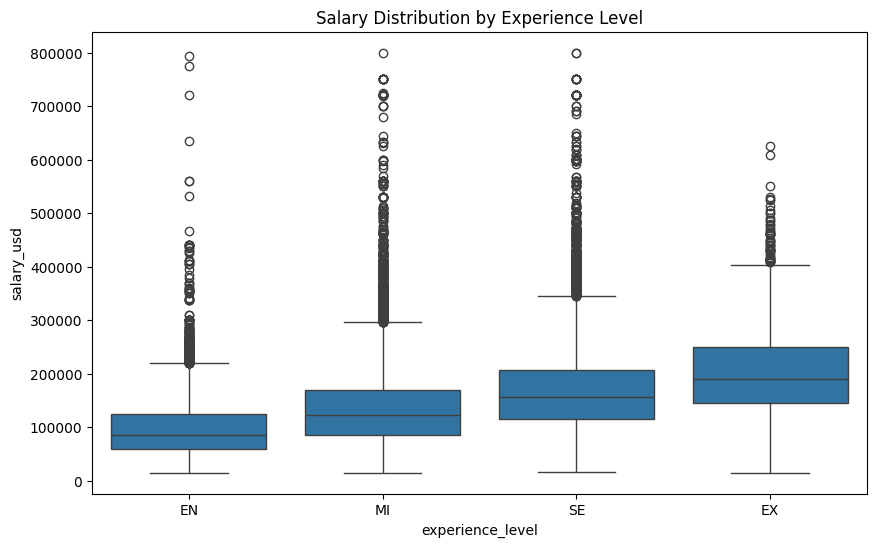

In [11]:
sns.boxplot(
    data=df,
    x="experience_level",
    y="salary_usd",
    order=["EN", "MI", "SE", "EX"]
)
plt.title("Salary Distribution by Experience Level")
plt.show()


The steep is clear there is clear difference in pay

In [12]:
pivot_exp_role = pd.pivot_table(
    df,
    values="salary_usd",
    index="job_title_clean",
    columns="experience_level",
    aggfunc="median"
)

pivot_exp_role


experience_level,EN,EX,MI,SE
job_title_clean,,,,
AI Engineer,76000.0,192500.0,133000.0,168910.0
Business Analyst,99900.0,122220.0,102000.0,116800.0
Data Analyst,81040.5,118680.0,87898.0,115600.0
Data Engineer,79654.0,196200.0,115909.0,149469.0
Data Scientist,88900.0,190000.0,120187.5,160000.0
ML Engineer,125500.0,222850.0,152050.0,188000.0
Other,88236.0,190000.0,124700.0,158290.0


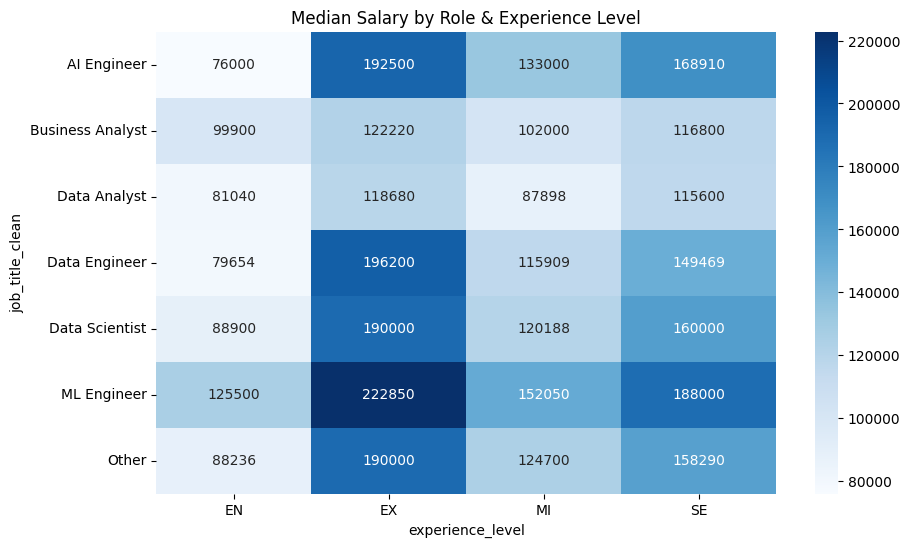

In [13]:
sns.heatmap(pivot_exp_role, annot=True, fmt=".0f", cmap="Blues")
plt.title("Median Salary by Role & Experience Level")
plt.show()


In [14]:
skill_salary = {
    "Python": df[df["requires_python"] == 1]["salary_usd"].median(),
    "SQL": df[df["requires_sql"] == 1]["salary_usd"].median(),
    "ML": df[df["requires_ml"] == 1]["salary_usd"].median(),
    "AI": df[df["requires_ai"] == 1]["salary_usd"].median(),
}

skill_salary


{'Python': np.float64(105000.0),
 'SQL': nan,
 'ML': np.float64(175000.0),
 'AI': np.float64(155600.0)}

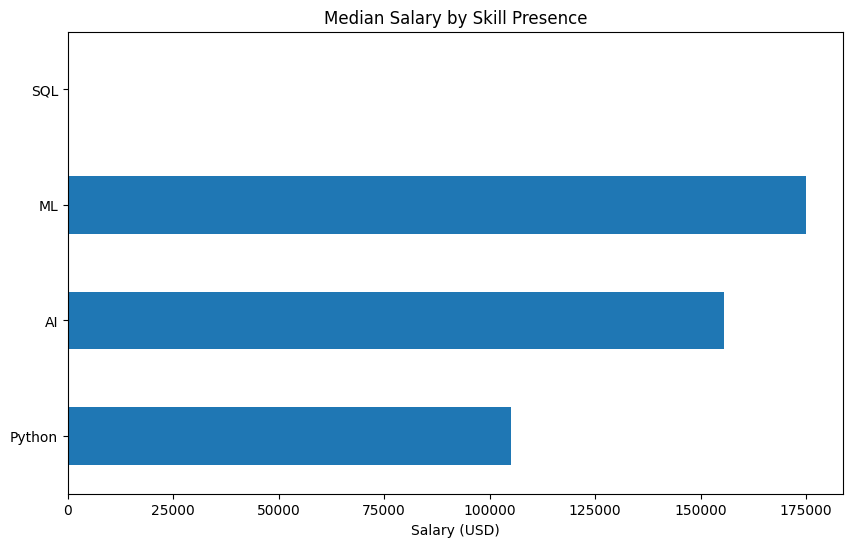

In [15]:
pd.Series(skill_salary).sort_values().plot(kind="barh")
plt.title("Median Salary by Skill Presence")
plt.xlabel("Salary (USD)")
plt.show()


ML engineers with experience have the highest pay.

In [16]:
top_countries = (
    df.groupby("company_country")["salary_usd"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)

top_countries


company_country
QA    300000.0
CD    250000.0
VE    192500.0
SA    150000.0
US    147200.0
HK    136871.0
NZ    124233.0
CH    120454.0
CA    119875.0
AU    117000.0
Name: salary_usd, dtype: float64

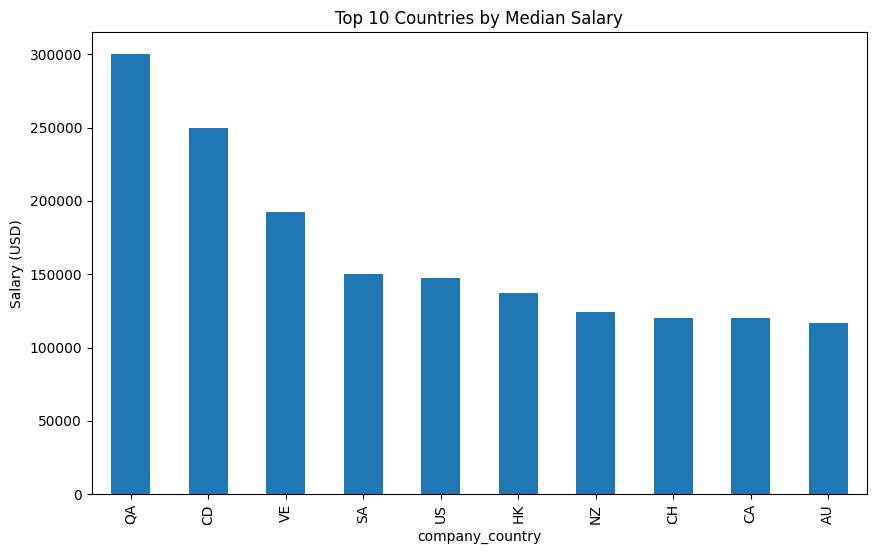

In [17]:
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Median Salary")
plt.ylabel("Salary (USD)")
plt.show()



For Dashboards

In [19]:

# Salary by role
salary_by_role.to_csv("../data/processed/salary_by_role.csv")

# Salary by role & experience
pivot_exp_role.to_csv("../data/processed/salary_by_role_experience.csv")

# Skill vs salary
pd.Series(skill_salary).to_csv("../data/processed/salary_by_skill.csv")
